In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# for reproduce purposes
SEED = 0
random.seed(SEED)
np.random.seed(SEED)

datadir = "."
infile = "../data/combined_training_datasets_unique_training.npy"
ratio = 0.1
epochs = 20
lr = 1e-3

## Load data

In [2]:
arr = np.load(infile)
X, Y = arr[:, :-1], arr[:, -1]
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X = X.T

nsamples = X.shape[1]
ndim = X.shape[0]

print(f"Number of samples: {nsamples}, Dimension of features: {ndim}")
print(f"Shape of X: {X.shape}, shape of Y: {Y.shape}")

Number of samples: 5994, Dimension of features: 86
Shape of X: (86, 5994), shape of Y: (5994,)


## Split dataset

In [3]:
val_size = int(nsamples*ratio)
X_train, Y_train = X[:, :-val_size], Y[:-val_size]
X_test, Y_test = X[:, -val_size:], Y[-val_size:]
print(f"Size of training set: {X_train.shape[1]}, Size of test set: {X_test.shape[1]}")

Size of training set: 5395, Size of test set: 599


## Model

### Design model


Assumption: For each $\mathbf{\textit x}\in \mathbb{R}^{N}$, $\textit y = \sum_{j=1}^{N} w_{i}*x_{i} + b$, 
which can be formatted as $\textit y = \mathbf{\textit x}^{T}\mathbf{\textit w}$


In [4]:
def model(x, w):
    pred = x.T@w
    return pred

In [5]:
def loss_fn(pred, truth):
    return np.mean((pred-truth)**2)

def grad_fn(x, pred, truth):
    dw = 2*(pred-truth)*x
    return dw

def optimize(w, dw):
    w -= lr*dw
    return w

### Training

In [6]:
def run_one_epoch():
    global W
    losses = []
    for idx in range(X_train.shape[0]):
        truth = Y_train[idx]
        x = X_train[:, idx]
        pred = model(x, W)
        l = loss_fn(pred, truth)
        dw = grad_fn(x, pred, truth)
        W = optimize(W, dw)
        losses.append(l)
    return np.mean(losses)

def evaluate():
    global W
    losses = []
    for idx in range(X_test.shape[0]):
        truth = Y_test[idx]
        x = X_test[:, idx]
        pred = model(x, W)
        l = loss_fn(pred, truth)
        losses.append(l)
    return np.mean(losses)

In [7]:
W = np.zeros(ndim, dtype=float)
train_epoch_losses = []
test_epoch_losses = []
for idx in range(epochs):
    l = run_one_epoch()
    train_epoch_losses.append(l)
    l = evaluate()
    test_epoch_losses.append(l)

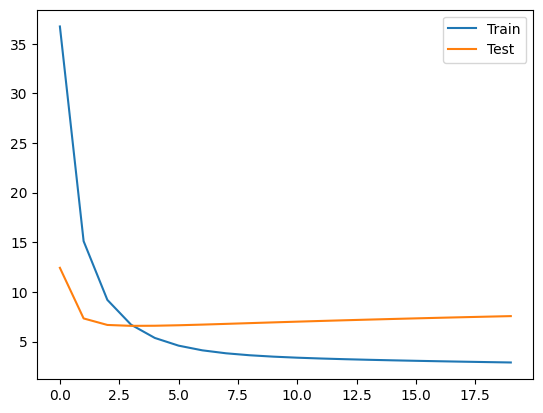

In [8]:
plt.plot(train_epoch_losses, label="Train")
plt.plot(test_epoch_losses, label="Test")
plt.legend()

## Analysis

11.37856074743629


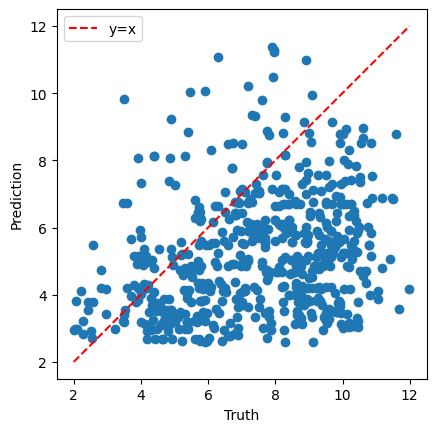

In [9]:
truth = Y_test
pred = model(X_test, W)
l = loss_fn(pred, truth)
print(l)


xreg = np.linspace(2, 12, num=100)
yreg = xreg
plt.plot(xreg, yreg, 'r--', label="y=x")
plt.scatter(truth, pred)
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.axis("square")
plt.legend()